The notebooks contains code for data processing and model development and evaluation using california housing dataset for predicting median house value


In [13]:
# Import necessary libraries and functions
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Data processing

In [2]:
# data formating
housing = fetch_california_housing() # access the data 
print(housing.DESCR) # print the description of the dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# prepare labels and features   
x = housing['data']
y = housing['target']

In [4]:
# scaling the data 
x_scaled = (x - x.mean()) / x.std() # standardize the data
y_scaled = (y - y.mean()) / y.std() # standardize the data

# Exploratory data analysis

<AxesSubplot:>

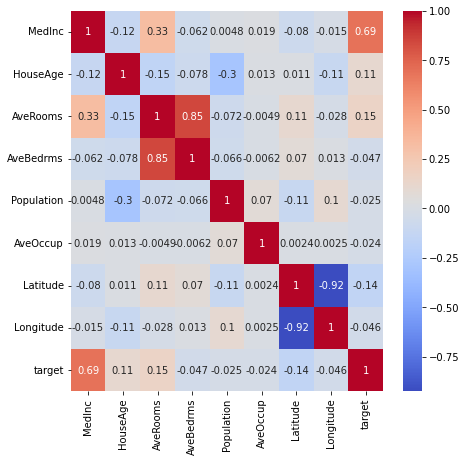

In [20]:
# correlation between features
x_df = pd.DataFrame(x, columns=housing['feature_names'])
y_df = pd.DataFrame(y, columns=['target'])
df = pd.concat([x_df, y_df], axis=1)
correlation = df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

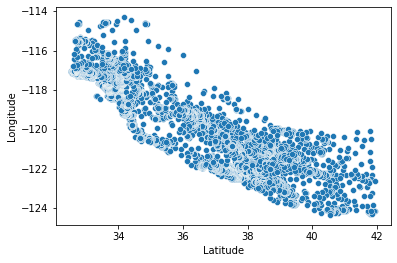

In [40]:
# latitude and  longitude correlation
sns.scatterplot(x=x_df['Latitude'], y=x_df['Longitude'])

Latitude and longitude are highly correlated and all other features seems to be not correlated

# Regression model development

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size=0.20)

In [6]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(16512, 8) (4128, 8)
(16512,) (4128,)


In [33]:
models = []
models.append(("SVR",SVR()))
models.append(("LinearRegression",LinearRegression()))
models.append(("KNeighborsRegression", KNeighborsRegressor()))
models.append(("SGDRegressor", SGDRegressor()))
models.append(("BayesianRidge", BayesianRidge()))
models.append(("DecisionTreeRegressor", DecisionTreeRegressor()))
models.append(("GradientBoostingRegressor", GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
table = []

# loop to fit each model and evaluate
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((r2, mse))
    names.append(name)
    table = table + [(name, r2, mse)]

<AxesSubplot:title={'center':'Model Performance'}>

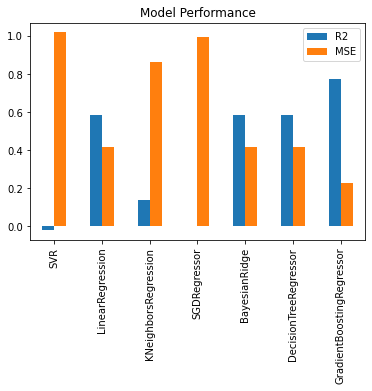

In [8]:
# bar plot of the results
results = pd.DataFrame(results, columns=['R2', 'MSE'], index=names)
results.plot(kind='bar', title='Model Performance')

In [35]:
table = pd.DataFrame(table, columns=['Model', 'R2', 'MSE'])

In [37]:
table

,Model,R2,MSE
0,SVR,-0.020689,1.017586
1,LinearRegression,0.582674,0.416057
2,KNeighborsRegression,0.136115,0.861259
3,SGDRegressor,0.001655,0.995310
4,BayesianRidge,0.582681,0.416051
5,DecisionTreeRegressor,0.585701,0.413039
6,GradientBoostingRegressor,0.772826,0.226484


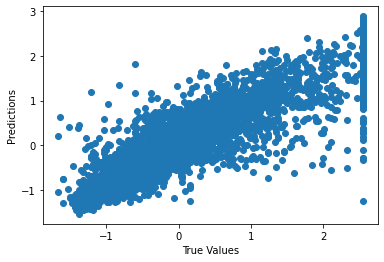

In [38]:
# model fitting
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# model evaluation
y_pred = model.predict(x_test)

# linearity between true values and predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [10]:
# coefficient of determination score and mean squared error for the model
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)
print(r2_s, mse_err)

0.7728176202454393 0.22649169382378204


# Cross valadation

In [23]:
# cross validation of the model with complete dataset
scores = cross_val_score(model, x_scaled, y_scaled, cv=3)
print(scores)

[0.65277155 0.72048638 0.66110462]


In [24]:
# cross validation of the model with split dataset
scores = cross_val_score(model, x_train, y_train, cv=3)
print(scores)

[0.77680075 0.78090986 0.80864275]


Inference - cross valadation score are lower for complete dataset and lower for split dataset. Is it called overfitting the model, how to reduce it?